# # Your objective is to build a [Bubble Plot] that showcases the relationship between four key variables:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

# Three Takeaways
1. As one would expect, rural areas have the highest average fare due to having to travel farther than more densely populated areas (Urban and even Suburban).
2. Urban areas account for 78 percent of all Pyber drivers and 62% of all Pyber rides. 
3. Urban areas have the shortest distance but the most volume of rides, therefore they account for almost 50% of total Pyber Revenue. look to exploit ride surges in urban areas for improved profit. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem
import seaborn 

In [2]:
#import data
city = 'raw_data/city_data.csv'
ride = 'raw_data/ride_data.csv'
city_df = pd.read_csv(city, low_memory=False)
ride_df = pd.read_csv(ride, low_memory=False)

#merge the two dataframes
pyber_df = pd.merge(ride_df, city_df, on="city", how="outer")
city_type = pyber_df["type"].unique()
city_type


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [3]:
#group by city and then find the average fare and number of ridew
city_group_df = pd.DataFrame(pyber_df)
city_group_df = city_group_df.groupby(["type", "city"])
city_fare_df = round(city_group_df.fare.agg(["count","mean"]),0)
city_fare_df.columns = ["Number of Rides", "Average Fare per Ride"]
city_fare_df["% of Total Rides"] = round(city_fare_df["Number of Rides"] / sum(city_fare_df["Number of Rides"]) * 100, 2)
city_fare_df["% of Total Fares"] = round(city_fare_df["Average Fare per Ride"] / sum(city_fare_df["Average Fare per Ride"]) * 100, 2)
city_fare_df.head(5)


Number of Rides  Average Fare per Ride  \
type  city                                                     
Rural East Leslie                  11                   34.0   
      East Stephen                 10                   39.0   
      East Troybury                 7                   33.0   
      Erikport                      8                   30.0   
      Hernandezshire                9                   32.0   

                      % of Total Rides  % of Total Fares  
type  city                                                
Rural East Leslie                 0.46              0.97  
      East Stephen                0.42              1.11  
      East Troybury               0.29              0.94  
      Erikport                    0.33              0.86  
      Hernandezshire              0.37              0.91

In [4]:
#group data by type only for piechart data
city_notype_df = pd.DataFrame(pyber_df)
city_notype_df = city_notype_df.groupby(["type"])
city_type_df = round(city_notype_df.fare.agg(["count","sum","mean"]),0)
city_type_df.columns = ["Number of Rides", "Total Revenue of Fares", "Average Fare per Ride"]
city_type_df["% of Total Rides"] = round(city_type_df["Number of Rides"] / sum(city_type_df["Number of Rides"]) * 100, 2)
city_type_df["% of Total Fares"] = round(city_type_df["Total Revenue of Fares"] / sum(city_type_df["Total Revenue of Fares"]) * 100, 2)
city_type_df.head(5)


,Number of Rides,Total Revenue of Fares,Average Fare per Ride,% of Total Rides,% of Total Fares
type,,,,,
Rural,125,4255.0,34.0,5.19,6.58
Suburban,657,20336.0,31.0,27.30,31.45
Urban,1625,40078.0,25.0,67.51,61.97


In [5]:
#split the data per city type
rural = city_fare_df.loc["Rural" , :]
urban = city_fare_df.loc["Urban" , :]
suburban = city_fare_df.loc["Suburban" , :]


In [6]:
drive1_df = pd.DataFrame(pyber_df)
drive2_df = drive1_df.drop_duplicates("city")
driver_count = drive2_df["driver_count"]

In [7]:
#find the total number of drivers per city
#how do i reset/make city and type the index (Like the two data frames above)
driver_df = pd.DataFrame(pyber_df)
driver_drop_df = driver_df.drop_duplicates("city")
driver_drop_df.head(126)
driver_drop_df = driver_drop_df.groupby("type")
driver_drop_df.head(200)
driver_count_df = driver_drop_df.driver_count.agg(["sum", "count"])
driver_count_df.columns = ["Drivers by City Type", "City Count"]
driver_count_df["% of Drivers Count"] = round(driver_count_df["Drivers by City Type"] / sum(driver_count_df["Drivers by City Type"]) * 100, 2)
driver_count_df





,Drivers by City Type,City Count,% of Drivers Count
type,,,
Rural,104,18,3.11
Suburban,635,41,18.98
Urban,2607,66,77.91


In [8]:
#merge_1_df = pd.concat([city_fare_df, rides_count_df], axis=1)
#merge_1_df.head()

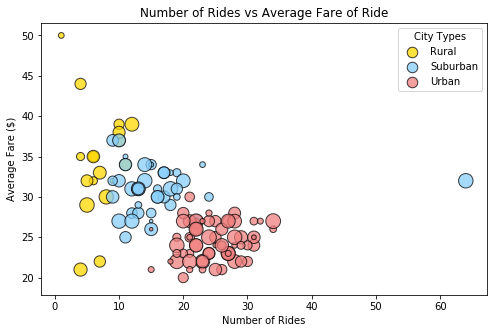

In [9]:
# Tells matplotlib that we want to make a scatter plot
x_axis1 = rural["Number of Rides"]
data1 = rural["Average Fare per Ride"]
x_axis2 = suburban["Number of Rides"]
data2 = suburban["Average Fare per Ride"]
x_axis3 = urban["Number of Rides"]
data3 = urban["Average Fare per Ride"]


plt.figure(figsize=(8,5))
plt.scatter(x_axis1, data1, marker="o", color="gold", edgecolors="black",
            s=driver_count*3, alpha=0.75)

plt.scatter(x_axis2, data2, marker="o", color="lightskyblue", edgecolors="black",
            s=driver_count*3, alpha=0.75)

plt.scatter(x_axis3, data3, marker="o", color="lightcoral", edgecolors="black",
            s=driver_count*3, alpha=0.75)

plt.title("Number of Rides vs Average Fare of Ride")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare ($)")
plt.legend(labels=('Rural','Suburban','Urban'), loc='best', title='City Types')
plt.style.use("seaborn-bright")
#print(plt.style.available)

#plt.show()

# Pie Chart for % of Total Fares by City Type

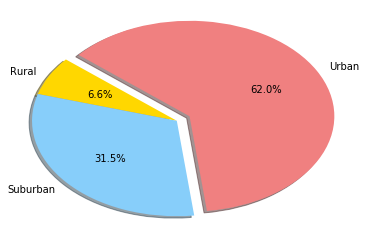

In [10]:
# Labels for the sections of our pie chart
labels = city_type_df.index.values

# The values of each section of the pie chart
sizes =city_type_df["% of Total Fares"]

# The colors of each section of the pie chart
colors = ['gold','lightskyblue','lightcoral']

explode = [0,0,0.1]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("tight")
plt.show()

# Pie Chart for % of Total Rides by City Type

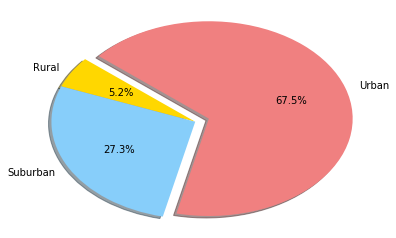

In [11]:
# Labels for the sections of our pie chart
labels = city_type_df.index.values

# The values of each section of the pie chart
sizes =city_type_df["% of Total Rides"]

# The colors of each section of the pie chart
colors = ['gold','lightskyblue','lightcoral']

explode = [0,0,0.1]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("tight")
plt.show()

# Pie Chart for % of Total Drivers by City Type

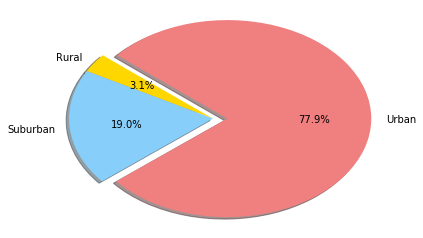

In [12]:
# Labels for the sections of our pie chart
labels = driver_count_df.index.values

# The values of each section of the pie chart
sizes =driver_count_df["% of Drivers Count"]

# The colors of each section of the pie chart
colors = ['gold','lightskyblue','lightcoral']

explode = [0,0,0.1]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("tight")
plt.show()